In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
median_house_hold_in_come_2015 = pd.read_csv("MedianHouseholdincome2015.csv",encoding = "windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding = "windows-1252")
percent_over_25_completed_high_school = pd.read_csv("PercentOver25CompletedHighSchool.csv",encoding = "windows-1252")
police_killing_us = pd.read_csv("PoliceKillingsUS.csv",encoding = "windows-1252")
share_race_by_city = pd.read_csv("ShareRaceByCity.csv",encoding = "windows-1252")

In [3]:
percent_over_25_completed_high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [4]:
percent_over_25_completed_high_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [6]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


# Drop "-" values

In [7]:
percent_over_25_completed_high_school["percent_completed_hs"].value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [8]:
percent_over_25_completed_high_school.percent_completed_hs.replace("-","0",inplace = True)
percent_over_25_completed_high_school.percent_completed_hs.value_counts()

100     1301
0        248
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 727, dtype: int64

In [9]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [10]:
percentage_people_below_poverty_level.poverty_rate.replace("-","0",inplace = True)
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1665
7.4      129
6.7      129
10.9     128
10       128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 770, dtype: int64

# Value Types

In [11]:
percent_over_25_completed_high_school.percent_completed_hs = percent_over_25_completed_high_school.percent_completed_hs.astype(float)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [12]:
percent_over_25_completed_high_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [13]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [18]:
percent_over_25_completed_high_school

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.0
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [19]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [27]:
hsGA = percent_over_25_completed_high_school["Geographic Area"].unique()
poGA = percentage_people_below_poverty_level["Geographic Area"].unique()

In [126]:
highSchool = []
poverty_rate = []
for i in hsGA:
    x = percent_over_25_completed_high_school[percent_over_25_completed_high_school["Geographic Area"] == i]
    highSchool.append(sum(x["percent_completed_hs"])/len(x["percent_completed_hs"]))
    y = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    poverty_rate.append(sum(y["poverty_rate"])/len(y["poverty_rate"]))

In [138]:
dict_concat = {"area":hsGA,"high_school":highSchool,"poverty_rate":poverty_rate}
concatDataFrame = pd.DataFrame(dict_concat)
concatDataFrame = concatDataFrame.sort_values("high_school",ascending = False)
concatDataFrame["Index"] = range(len(concatDataFrame))
concatDataFrame = concatDataFrame.set_index("Index")

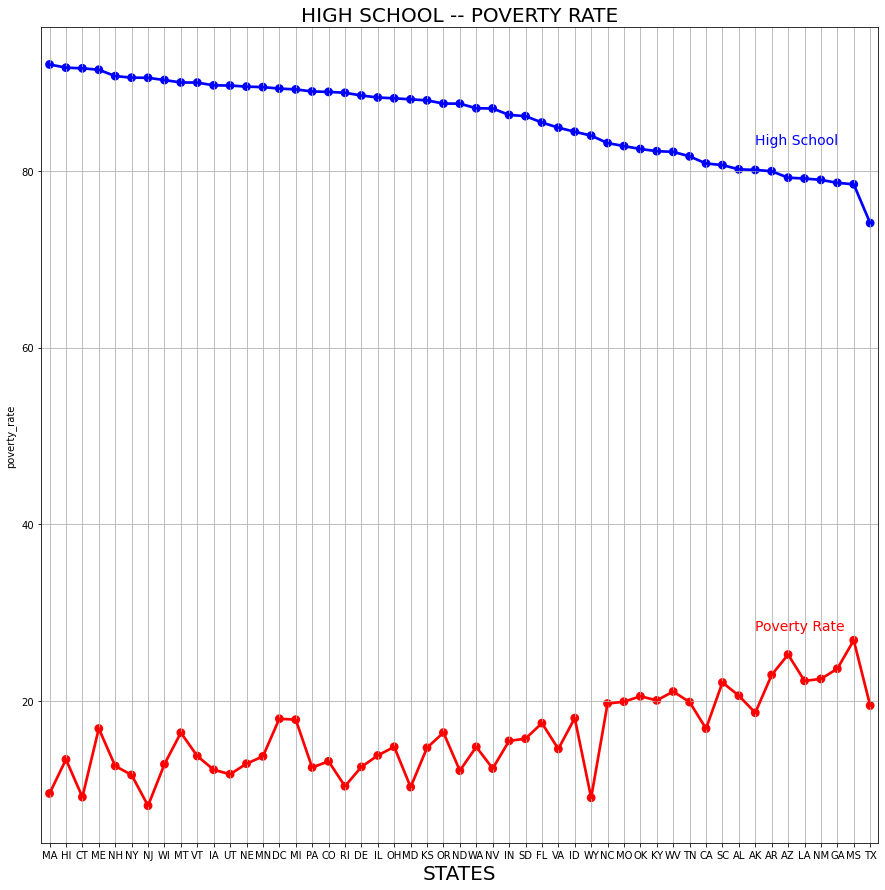

In [139]:
plt.figure(figsize=(15,15))
sns.pointplot(x = concatDataFrame["area"],y = concatDataFrame["high_school"],color = "blue")
sns.pointplot(x = concatDataFrame["area"],y = concatDataFrame["poverty_rate"],color = "red")
plt.xlabel("STATES",fontsize = 20)
plt.title("HIGH SCHOOL -- POVERTY RATE",fontsize =20)
plt.text(43,83,"High School",color = "blue",fontsize = 14)
plt.text(43,28,"Poverty Rate",color = "red",fontsize = 14)
plt.grid()
plt.show()

C:\Users\90539\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\90539\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


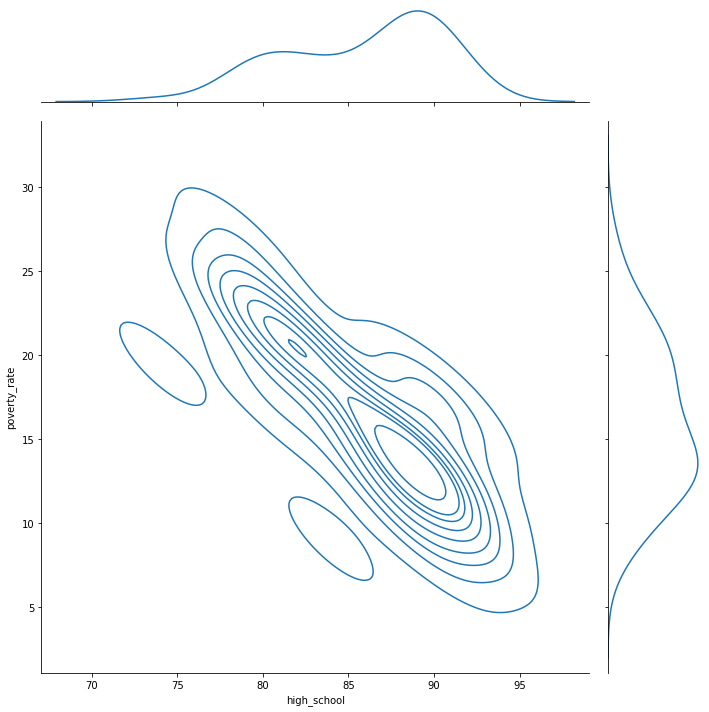

In [140]:
#joinplot
sns.jointplot(concatDataFrame["high_school"],concatDataFrame["poverty_rate"],kind = "kde",size = 10)
plt.show()

# Pie Plot

In [141]:
police_killing_us.dropna(inplace = True)
police_killing_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [142]:
data = police_killing_us.race.value_counts().values
unique_race = police_killing_us.race.unique()

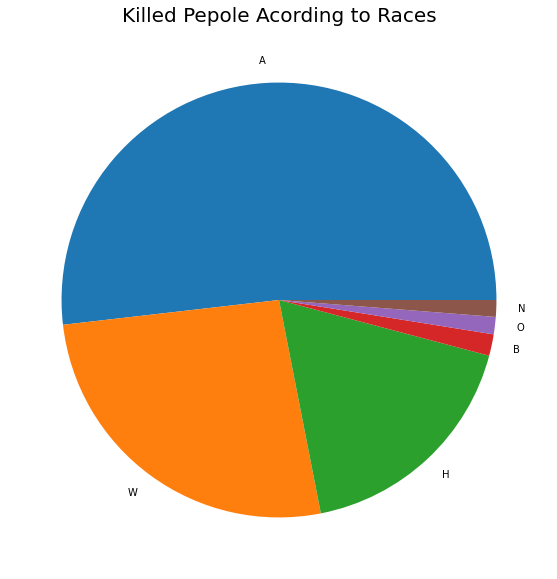

In [143]:
plt.figure(figsize = (10,10))
plt.pie(data,labels = unique_race)
plt.title("Killed Pepole Acording to Races",color = "black",fontsize = 20)
plt.show()

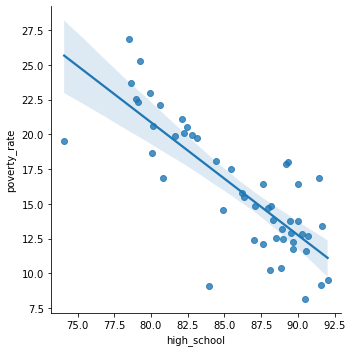

In [144]:
#lm plot
sns.lmplot(x = "high_school",y = "poverty_rate",data = concatDataFrame)
plt.show()

C:\Users\90539\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


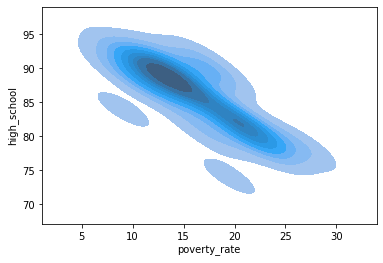

In [145]:
#kde plot
sns.kdeplot(concatDataFrame.poverty_rate,concatDataFrame.high_school,shade = True)
plt.show()

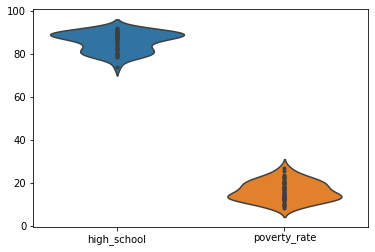

In [146]:
#violin plot
sns.violinplot(data = concatDataFrame, inner = "point")
plt.show()

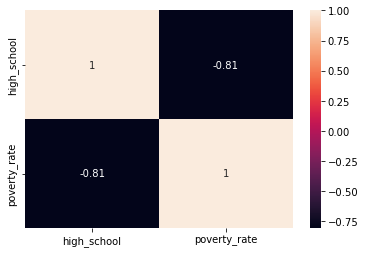

In [152]:
#heatmap
sns.heatmap(concatDataFrame.corr(),annot = True)
plt.show()

In [155]:
#boxplot
police_killing_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


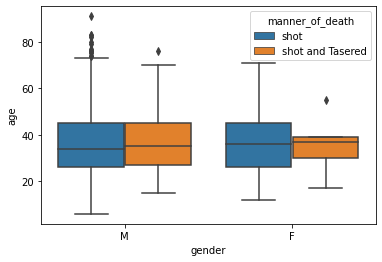

In [156]:
sns.boxplot(x = "gender",y = "age",hue = "manner_of_death",data = police_killing_us)
plt.show()

C:\Users\90539\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


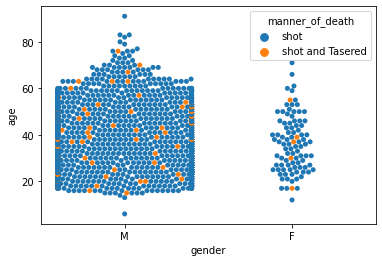

In [157]:
#swarmplot
sns.swarmplot(x = "gender",y = "age",hue = "manner_of_death",data=police_killing_us)
plt.show()

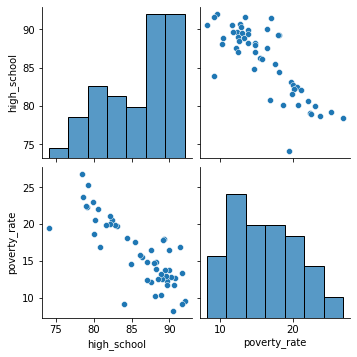

In [158]:
#pairplot
sns.pairplot(concatDataFrame)
plt.show()

C:\Users\90539\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


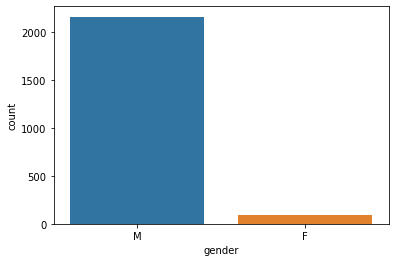

In [159]:
#count plot
sns.countplot(police_killing_us.gender)
plt.show()

In [160]:
police_killing_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


C:\Users\90539\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


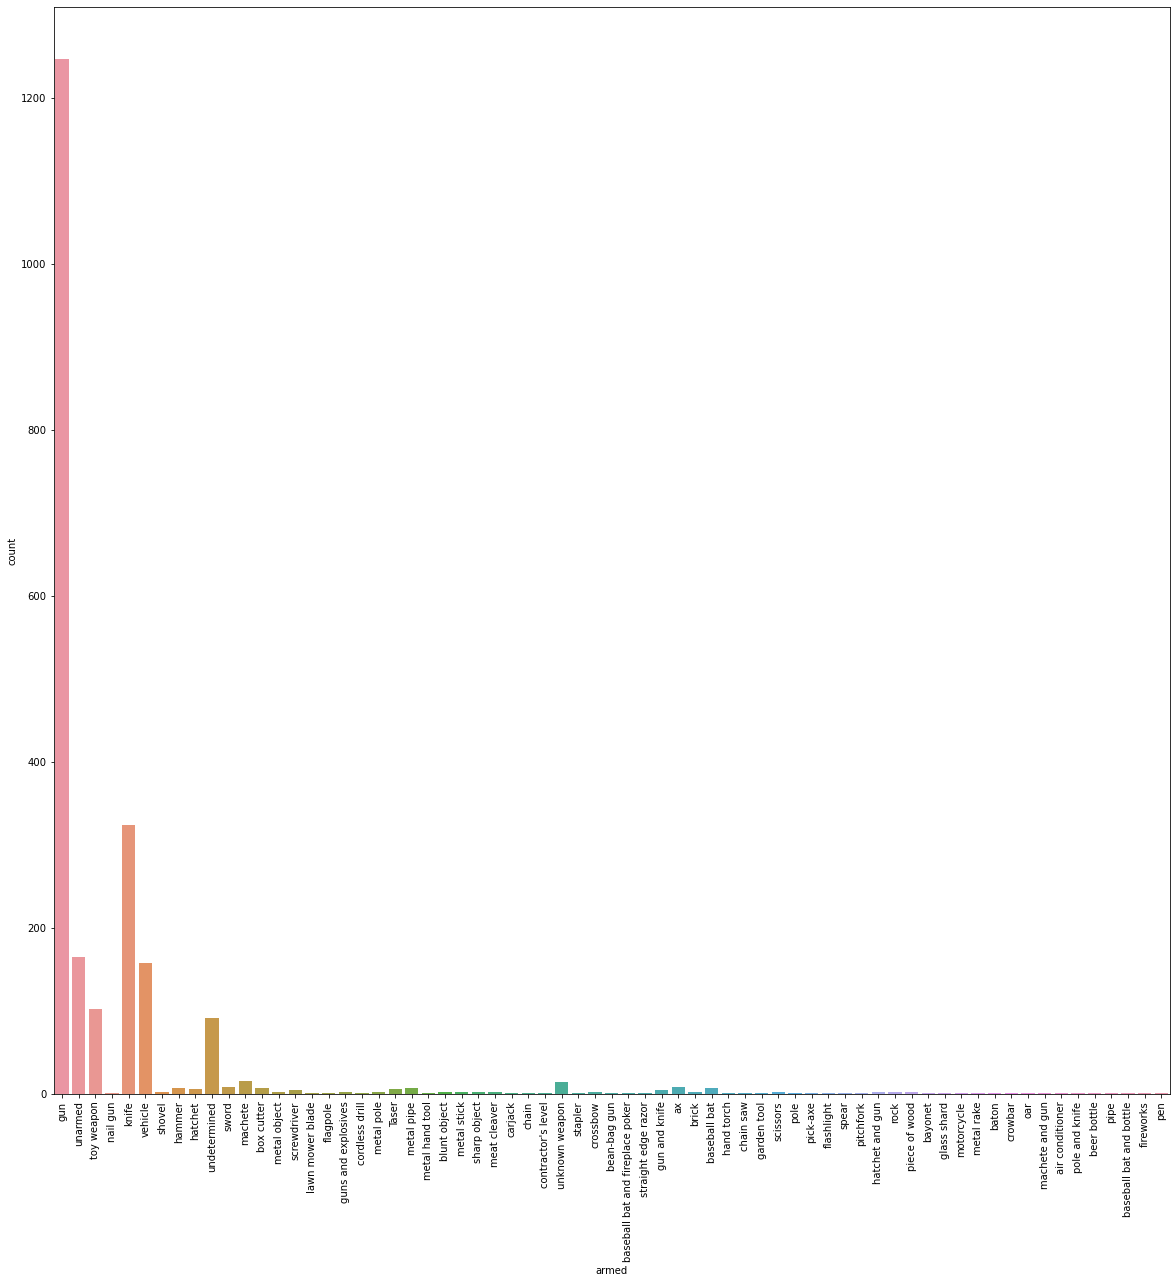

In [166]:
plt.figure(figsize = (20,20))
sns.countplot(police_killing_us.armed)
plt.xticks(rotation = 90)
plt.show()

In [167]:
police_killing_us.armed.value_counts()

gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: armed, Length: 67, dtype: int64